## Lab4

## import libs and connect to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:

config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [4]:
cur=conn.cursor()

# q1

In [7]:
sql_q1 = """
            select * from gp30.student
            """

In [8]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s6@jmu.edu,s6,GS
5,s5@jmu.edu,s5,GS
6,s7@jmu.edu,s7,GS


# q2

In [9]:
sql_q2 = """
        select gp30.professor.p_name,
        gp30.course.c_name
        from gp30.professor
        inner join gp30.course
        on gp30.professor.p_email = gp30.course.p_email
        
        """

In [10]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Valerie Sulfaro,U.S. Government
1,Noel Hendrickson,Counterfactual Reasoning
2,Ronald Raab,Weapons of Mass Destruction
3,Cecilia Calrk,Cyber Security-Zero Days
4,new_p,new_c_name
5,new_p,Data Mining


# q3

In [11]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp30.enroll_list
        group by c_number
        order by enrolled desc
        """

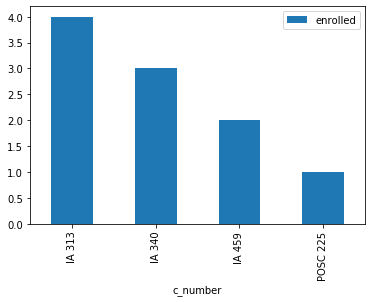

In [12]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

# q4

In [13]:
sql_q4 = """
        select gp30.professor.p_name,
        count(gp30.course.c_name) as teaching_number
        from gp30.professor
        inner join gp30.course
        on gp30.professor.p_email = gp30.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

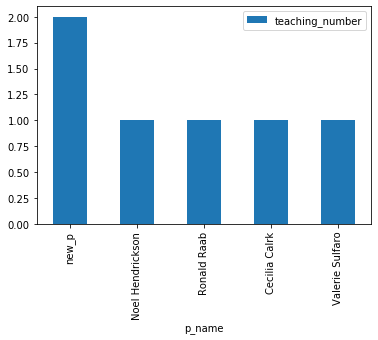

In [14]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

# q5

In [28]:
sql_q6_professor = """
                    insert into gp30.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p2@jmu.edu','new_p2','new_office2')

In [29]:
cur.execute(sql_q6_professor)

In [30]:
cur.execute("ROLLBACK")

In [31]:
conn.commit()

In [36]:
df=pandas.read_sql_query('select * from gp30.professor',conn)
df[:]

,p_email,p_name,office
0,raarbrw@jmu.edu,Ronald Raab,ISAT/CS 156
1,sulfarva@jmu.edu,Valerie Sulfaro,None
2,hendrinx@jmu.edu,Noel Hendrickson,None
3,clark6ce@jmu.edu,Cecilia Calrk,ISAT/CS 169
4,new_p@jmu.edu,new_p,new_office
5,new_p2@jmu.edu,new_p2,new_office2


In [37]:
sql_q6_course = """
                    insert into gp30.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new2','new_c_name2','online','new_p2@jmu.edu')

In [38]:
cur.execute(sql_q6_course)

In [39]:
cur.execute("ROLLBACK")

In [40]:
conn.commit()

In [41]:
df=pandas.read_sql_query('select * from gp30.course',conn)
df[:]

,c_number,c_name,room,p_email
0,POSC 225,U.S. Government,Grafton,sulfarva@jmu.edu
1,IA 313,Counterfactual Reasoning,ISAT/CS 148,hendrinx@jmu.edu
2,IA 459,Weapons of Mass Destruction,ENGEO 1301,raarbrw@jmu.edu
3,IA 420,Cyber Security-Zero Days,ENGEO 2132,clark6ce@jmu.edu
4,ia_new,new_c_name,ENGEO_2132,new_p@jmu.edu
5,IA 340,Data Mining,Online,new_p@jmu.edu
6,ia_new2,new_c_name2,online,new_p2@jmu.edu


# q6

In [48]:
sql_q7_course = """
                update gp30.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [49]:
cur.execute(sql_q7_course)

In [50]:
cur.execute('ROLLBACK')

In [51]:
conn.commit()

In [52]:
df=pandas.read_sql_query('select * from gp30.course',conn)
df[:]

,c_number,c_name,room,p_email
0,POSC 225,U.S. Government,Grafton,sulfarva@jmu.edu
1,IA 313,Counterfactual Reasoning,ISAT/CS 148,hendrinx@jmu.edu
2,IA 459,Weapons of Mass Destruction,ENGEO 1301,raarbrw@jmu.edu
3,IA 420,Cyber Security-Zero Days,ENGEO 2132,clark6ce@jmu.edu
4,ia_new,new_c_name,ENGEO_2132,new_p@jmu.edu
5,IA 340,Data Mining,Online,new_p@jmu.edu
6,ia_new2,new_c_name2,online,new_p2@jmu.edu


In [58]:
sql_q7_professor = """
                delete from gp30.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [59]:
cur.execute(sql_q7_professor)

In [60]:
cur.execute('ROLLBACK')

In [61]:
conn.commit()

In [62]:
df=pandas.read_sql_query('select * from gp30.professor',conn)
df[:]

,p_email,p_name,office
0,raarbrw@jmu.edu,Ronald Raab,ISAT/CS 156
1,sulfarva@jmu.edu,Valerie Sulfaro,None
2,hendrinx@jmu.edu,Noel Hendrickson,None
3,clark6ce@jmu.edu,Cecilia Calrk,ISAT/CS 169
4,new_p@jmu.edu,new_p,new_office
5,new_p2@jmu.edu,new_p2,new_office2


# close connection

In [64]:
cur.close()
conn.close()